In [1]:
import pandas as pd

df = pd.read_csv("dataset.csv")

In [2]:
df.shape

(25000, 16)

In [3]:
increase = 0
decrease = 0
stable = 0


for _, row in df.iterrows():
    if row["label"]=="Increase":
        increase = increase + 1
    elif row["label"]=="Decrease":
        decrease = decrease + 1
    else:
        stable = stable + 1
# print(df.shape)
print("Credit Score increase = ", increase)
print("Credit Score decrease = ", decrease)
print("Credit Score stable = ", stable)

Credit Score increase =  11768
Credit Score decrease =  3346
Credit Score stable =  9886


# EDA


In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

numeric_cols = df.select_dtypes(include=['float', 'int'])
categorical_cols = df['label']

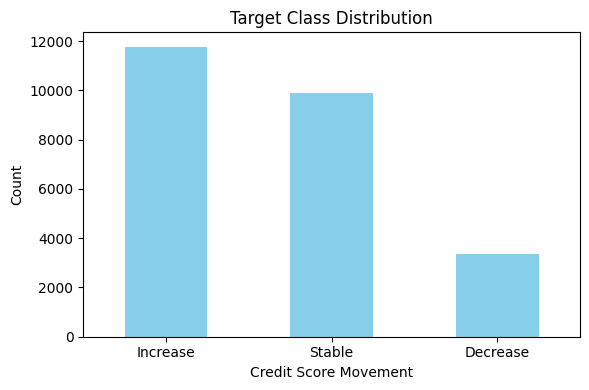

In [5]:
 # 1. Target Class Distribution
plt.figure(figsize=(6, 4))
df['label'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Target Class Distribution')
plt.xlabel('Credit Score Movement')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

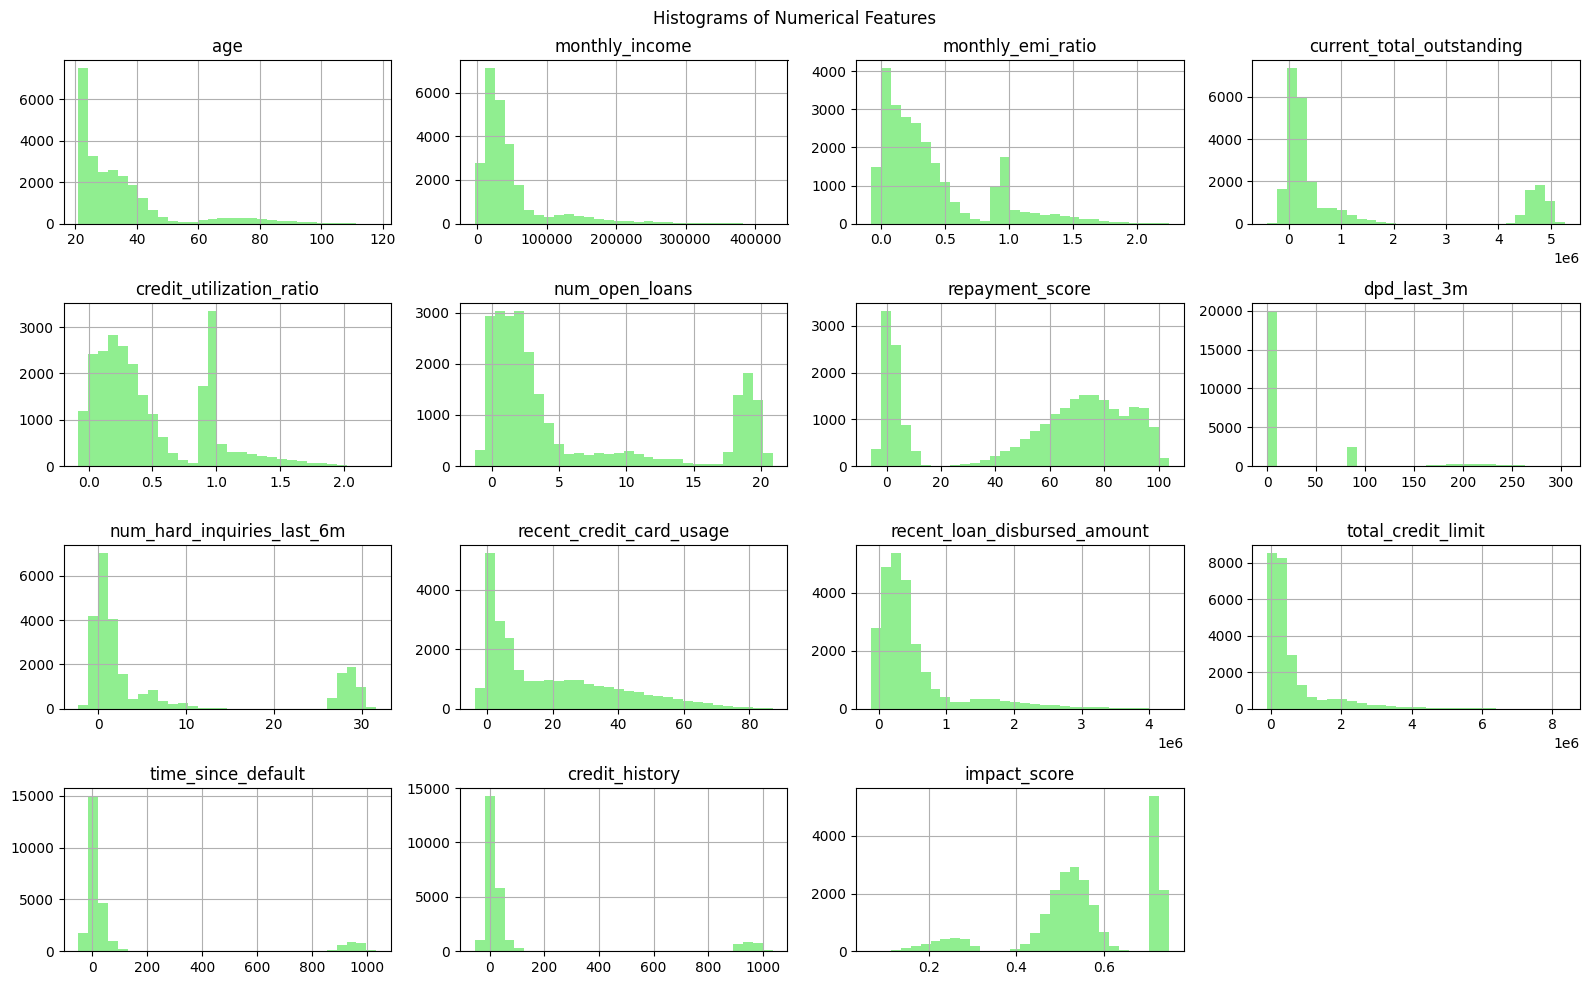

In [6]:
numeric_cols = numeric_cols.columns.tolist()
df[numeric_cols].hist(figsize=(16, 10), bins=30, color='lightgreen')
plt.suptitle('Histograms of Numerical Features')
plt.tight_layout()
plt.show()

Takeaway : These distributions suggest that normalization or transformation (such as log-scaling) may be beneficial before modeling.


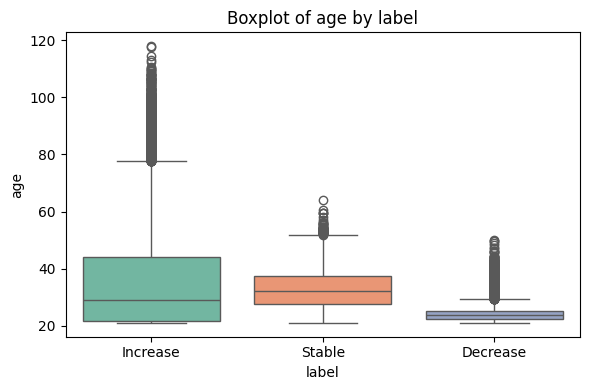

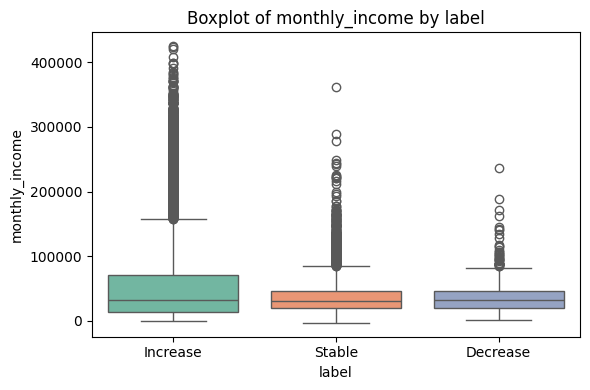

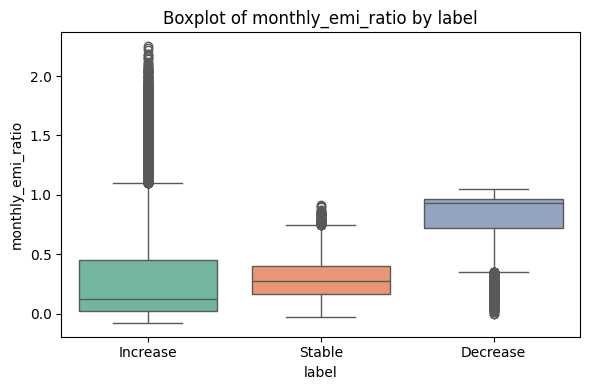

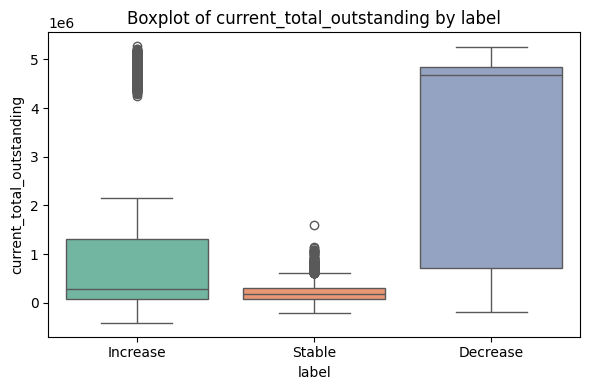

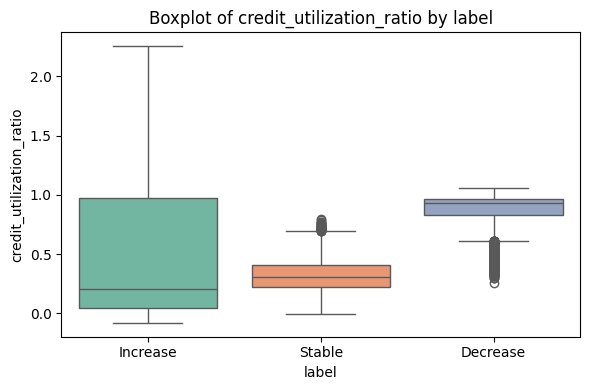

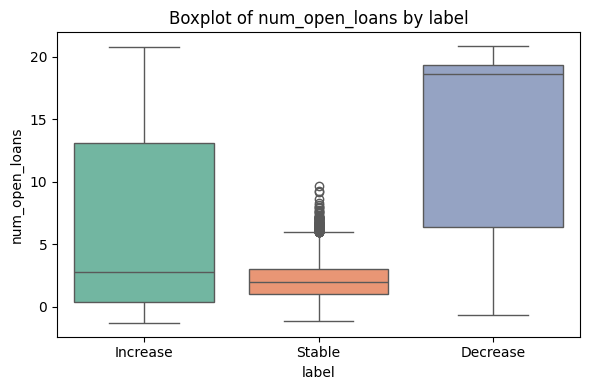

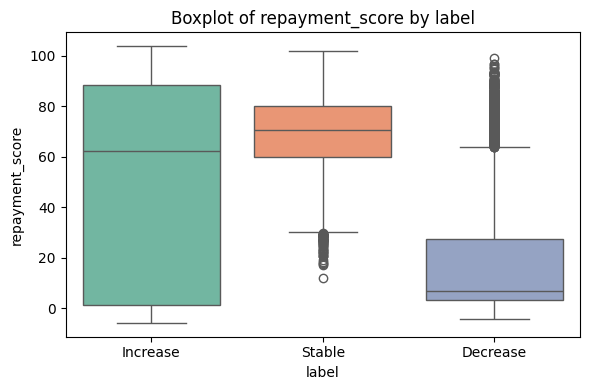

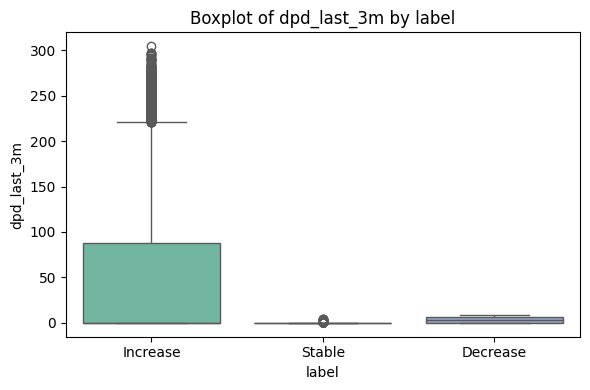

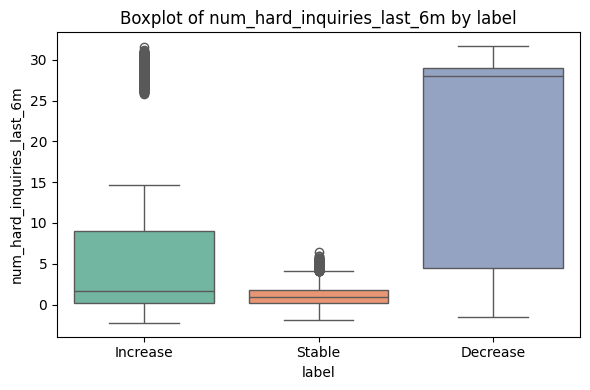

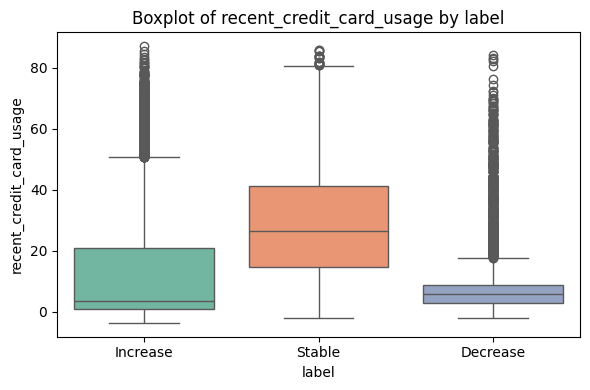

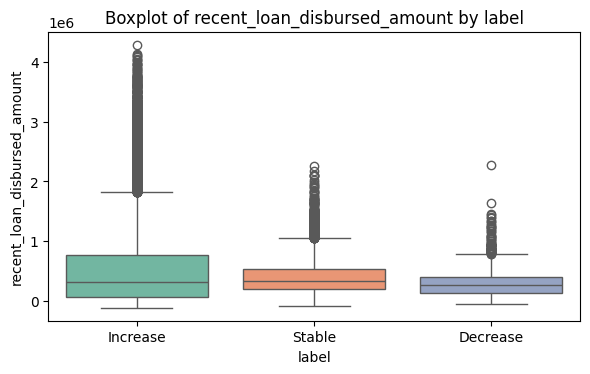

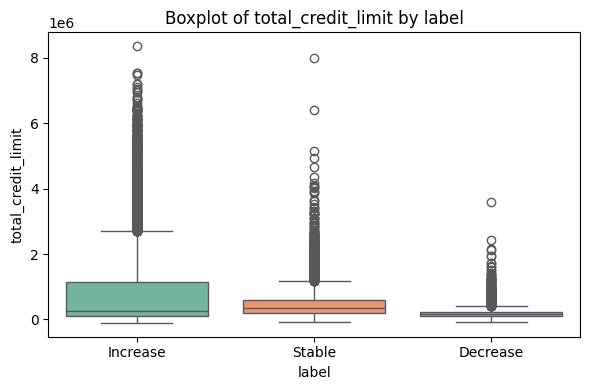

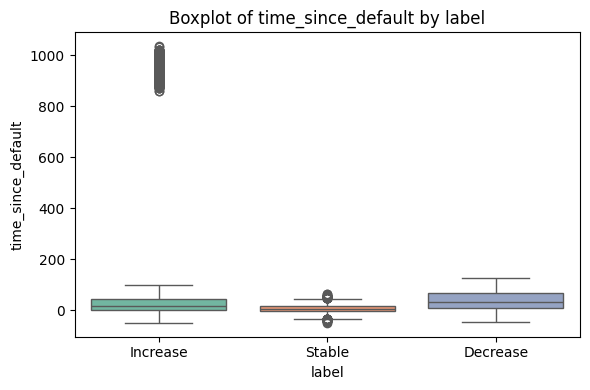

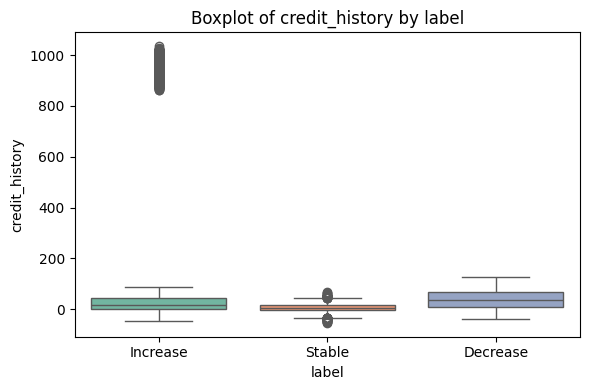

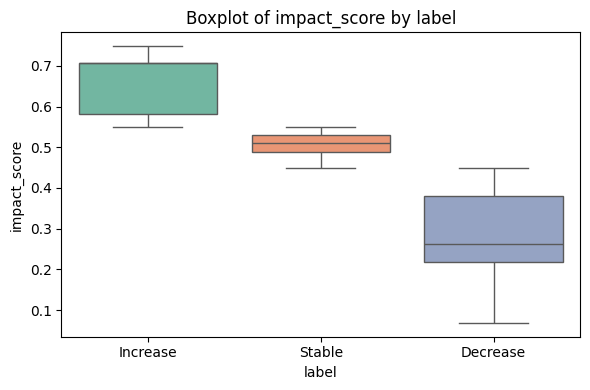

In [7]:
for col in numeric_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(data=df, x='label', y=col, hue='label', palette="Set2", legend=False)

    plt.title(f'Boxplot of {col} by label')
    plt.tight_layout()
    plt.show()

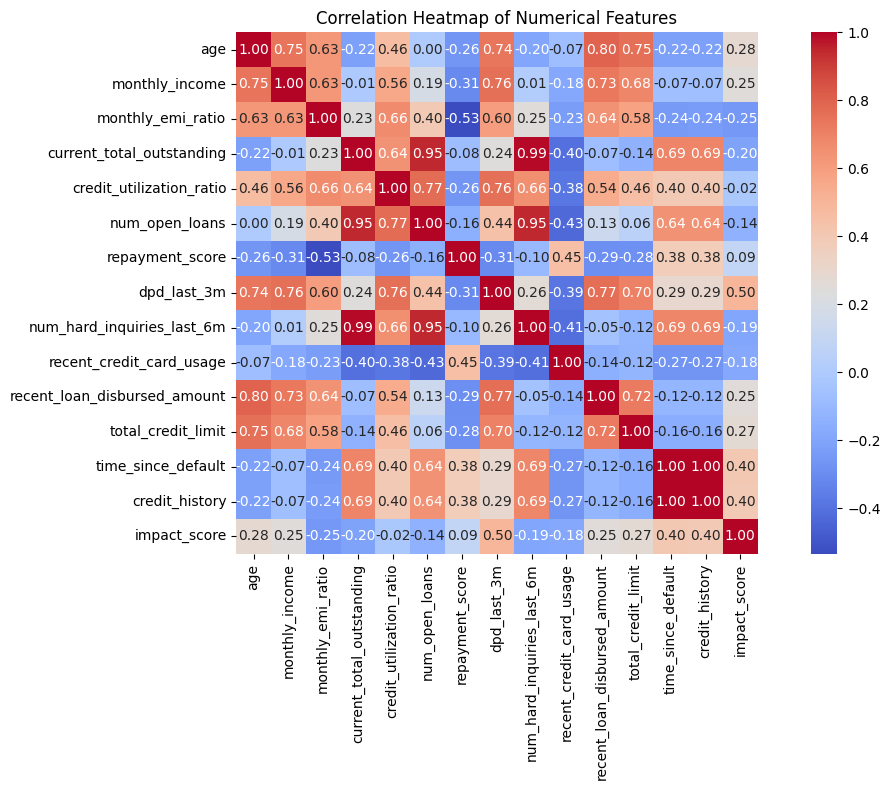

In [8]:
plt.figure(figsize=(12, 8))
corr = df[numeric_cols].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Correlation Heatmap of Numerical Features')
plt.tight_layout()
plt.show()

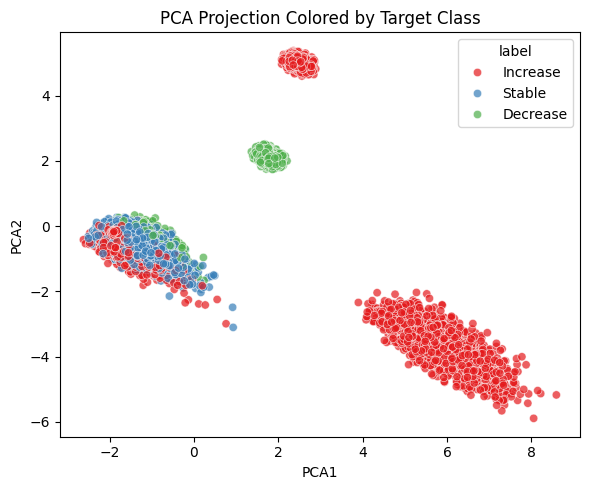

In [9]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[numeric_cols].fillna(0))
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
pca_df = pd.DataFrame(X_pca, columns=['PCA1', 'PCA2'])
pca_df['label'] = df['label'].values
plt.figure(figsize=(6, 5))
sns.scatterplot(data=pca_df, x='PCA1', y='PCA2', hue='label', palette='Set1', alpha=0.7)
plt.title('PCA Projection Colored by Target Class')
plt.tight_layout()
plt.show()

Takeaway : 

- The "Decrease" class (green) forms a very tight, isolated cluster. This means the underlying features of these samples are very consistent and different from the other classes. 
- The "Increase" class (blue) is also well-separated, although it appears to be split into two distinct sub-clusters: a large, elongated group in the top-right and a smaller, tight group in the bottom-right.  It suggests there might be two different "types" or "reasons" for an "Increase."
- The "Stable" class (red) is clustered on the left but shows significant overlap with some of the "Increase" and "Decrease" samples in that region.


Takeaway : 
- We will models handle non-linear relationships, are resilient to outliers, and can manage correlated features well such as XGBoost, random-forest or logistic regression.

## Preprocessing

In [10]:
#Encoding the labels
from tabulate import tabulate
# Using LabelEncoder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['label_encoded'] = le.fit_transform(df['label'])
df_encoded = df.drop('label',axis=1)
print(tabulate(df_encoded.head(100), headers='keys', tablefmt='grid'))

+----+---------+------------------+---------------------+-----------------------------+----------------------------+------------------+-------------------+---------------+------------------------------+----------------------------+--------------------------------+----------------------+----------------------+------------------+----------------+-----------------+
|    |     age |   monthly_income |   monthly_emi_ratio |   current_total_outstanding |   credit_utilization_ratio |   num_open_loans |   repayment_score |   dpd_last_3m |   num_hard_inquiries_last_6m |   recent_credit_card_usage |   recent_loan_disbursed_amount |   total_credit_limit |   time_since_default |   credit_history |   impact_score |   label_encoded |
+====+=========+==================+=====================+=============================+============================+==================+===================+===============+==============================+============================+================================+======

C:\Users\Samsung\AppData\Roaming\Python\Python313\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\Samsung\AppData\Roaming\Python\Python313\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\Samsung\AppData\Roaming\Python\Python313\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\Samsung\AppData\Roaming\Python\Python313\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\Samsung\AppData\Roaming\Python\Python313\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\S

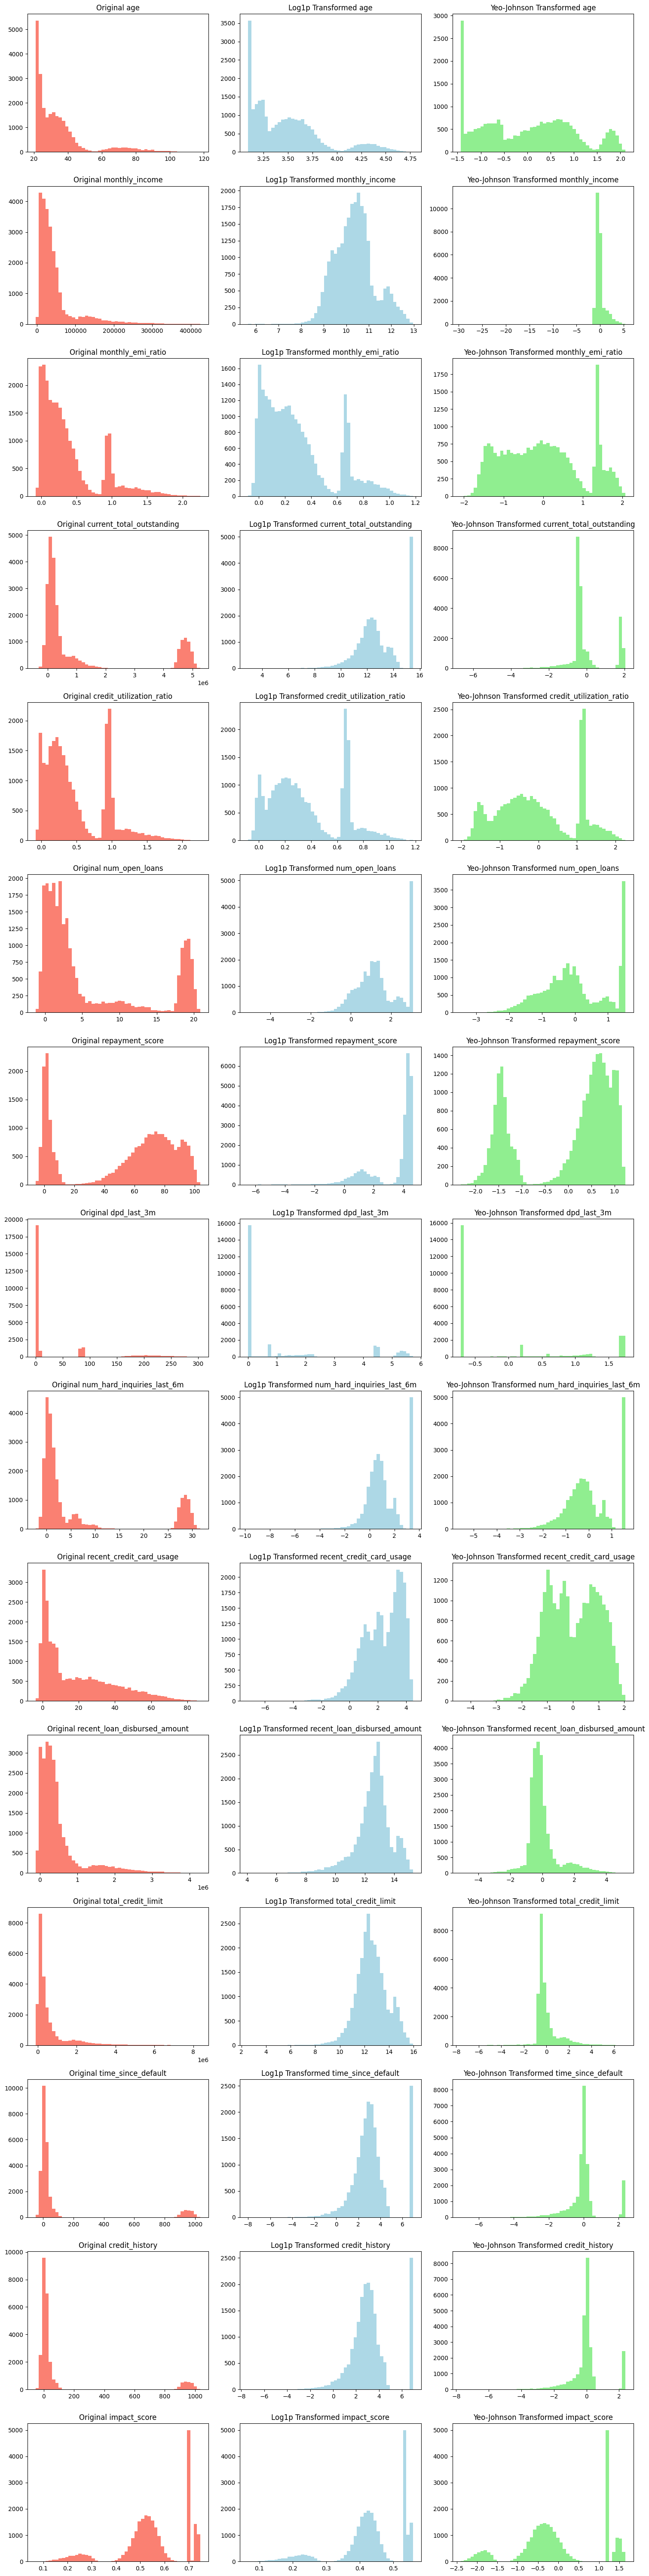

In [11]:
from sklearn.preprocessing import PowerTransformer
import numpy as np
from scipy.stats import skew

original_skew = 0
log_skew = 0
yeo_skew = 0
n = 0
# Plot before and after histograms using log1p and Yeo-Johnson
fig, axs = plt.subplots(len(numeric_cols), 3, figsize=(15, 4 * len(numeric_cols)))
pt = PowerTransformer(method='yeo-johnson')

for i, col in enumerate(numeric_cols):
    # Original
    axs[i, 0].hist(df_encoded[col], bins=50, color='salmon')
    axs[i, 0].set_title(f'Original {col}')
    
    # Log1p Transform
    log_data = np.log1p(df_encoded[col])
    
    axs[i, 1].hist(log_data, bins=50, color='lightblue')
    axs[i, 1].set_title(f'Log1p Transformed {col}')
    
    # Yeo-Johnson Transform
    yeo_data = pt.fit_transform(df_encoded[[col]])
    axs[i, 2].hist(yeo_data, bins=50, color='lightgreen')
    axs[i, 2].set_title(f'Yeo-Johnson Transformed {col}')
    
    n +=1


plt.tight_layout()
plt.show()

Takeaways : Applying log10 (blue) and power (green) transformations significantly normalizes these distributions, reducing skewness and bringing them closer to a Gaussian shape. The skew of yeo transformation is closer to bell shape, hence we will work using this transformation.

In [12]:
df = df_encoded
column_names = df_encoded.drop('label_encoded',axis = 1).columns
df_yeo = pd.DataFrame(pt.fit_transform(df_encoded.drop('label_encoded',axis=1)), columns=column_names)
df_yeo = pd.concat([df_yeo, df['label_encoded']], axis=1)
print(tabulate(df_encoded.head(100), headers='keys', tablefmt='grid'))
print(tabulate(df_yeo.head(100), headers='keys', tablefmt='grid'))

+----+---------+------------------+---------------------+-----------------------------+----------------------------+------------------+-------------------+---------------+------------------------------+----------------------------+--------------------------------+----------------------+----------------------+------------------+----------------+-----------------+
|    |     age |   monthly_income |   monthly_emi_ratio |   current_total_outstanding |   credit_utilization_ratio |   num_open_loans |   repayment_score |   dpd_last_3m |   num_hard_inquiries_last_6m |   recent_credit_card_usage |   recent_loan_disbursed_amount |   total_credit_limit |   time_since_default |   credit_history |   impact_score |   label_encoded |
+====+=========+==================+=====================+=============================+============================+==================+===================+===============+==============================+============================+================================+======

## Handling Class Imbalance

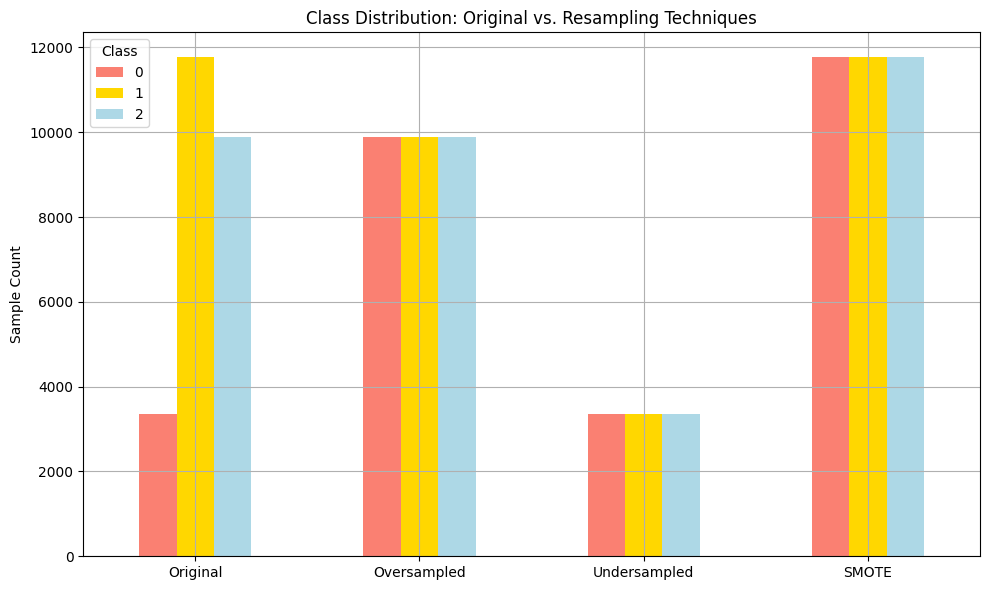

In [13]:
from sklearn.utils import resample
from imblearn.over_sampling import SMOTE
from collections import Counter

def sampling(df: pd.DataFrame):
# Separate features and target
    X = df.drop(columns=['label_encoded'])
    y = df['label_encoded']

    # 1. Random Oversampling
    df_majority = df[df.label_encoded == 2]
    df_minority = df[df.label_encoded ==  0]
    df_mid = df[df.label_encoded == 1]

    df_minority_upsampled = resample(df_minority, replace=True, n_samples=len(df_majority), random_state=42)
    df_mid_upsampled = resample(df_mid, replace=True, n_samples=len(df_majority), random_state=42)
    df_oversampled = pd.concat([df_majority, df_mid_upsampled, df_minority_upsampled])

    # 2. Random Undersampling
    df_majority_downsampled = resample(df_majority, replace=False, n_samples=len(df_minority), random_state=42)
    df_mid_downsampled = resample(df_mid, replace=False, n_samples=len(df_minority), random_state=42)
    df_undersampled = pd.concat([df_majority_downsampled, df_mid_downsampled, df_minority])

    # 3. SMOTE
    smote = SMOTE(random_state=42)
    X_smote, y_smote = smote.fit_resample(X.select_dtypes(include=[np.number]), y)

    # Count distributions
    original_counts = Counter(y)
    oversample_counts = Counter(df_oversampled['label_encoded'])
    undersample_counts = Counter(df_undersampled['label_encoded'])
    smote_counts = Counter(y_smote)

    # Plotting
    count_data = pd.DataFrame({
        'Original': pd.Series(original_counts),
        'Oversampled': pd.Series(oversample_counts),
        'Undersampled': pd.Series(undersample_counts),
        'SMOTE': pd.Series(smote_counts)
    }).T

    count_data.plot(kind='bar', figsize=(10, 6), color=['salmon', 'gold', 'lightblue'])
    plt.title("Class Distribution: Original vs. Resampling Techniques")
    plt.ylabel("Sample Count")
    plt.xticks(rotation=0)
    plt.legend(title="Class")
    plt.grid(True)
    plt.tight_layout()
    plt.show()
    
sampling(df)

## Trying out a bunch of models for comparision of which processed data is better

In [14]:
import pandas as pd
from sklearn.model_selection import StratifiedKFold, cross_val_predict
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE, RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import precision_recall_fscore_support

# Split data


In [15]:
def evaluate_model(model, model_name, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"\n=== {model_name} ===")
    print(classification_report(y_test, y_pred, digits=3))


In [16]:
sampling_methods = {
    'original': None,
    'oversample': RandomOverSampler(random_state=42),
    'undersample': RandomUnderSampler(random_state=42),
    'smote': SMOTE(random_state=42)
}

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(max_depth=5, random_state=42),
    "SVM (RBF Kernel)": SVC()
}



In [17]:


def run_cv(X, y, model_name, model, sampler_name, sampler, scale=False, k=5):
    print(f"\n🔍 Model: {model_name} | Sampling: {sampler_name}")
    
    steps = []
    if sampler: steps.append(('sampling', sampler))
    if scale: steps.append(('scaler', StandardScaler()))
    steps.append(('model', model))

    pipeline = ImbPipeline(steps)
    cv = StratifiedKFold(n_splits=k, shuffle=True, random_state=42)

    y_pred = cross_val_predict(pipeline, X, y, cv=cv)
    report = classification_report(y, y_pred, digits=3, output_dict=True)

    print(classification_report(y, y_pred, digits=3))
    return {
        'model': model_name,
        'sampling': sampler_name,
        'macro_f1': report['macro avg']['f1-score'],
        'recall_decrease': report.get('Decrease', {}).get('recall', 0),
        'f1_decrease': report.get('Decrease', {}).get('f1-score', 0)
    }


In [18]:
results = []
X = df.drop(columns='label_encoded')
y = df['label_encoded']

for sampler_name, sampler in sampling_methods.items():
    for model_name, model in models.items():
        scale = model_name in ['Logistic Regression', 'SVM (RBF Kernel)']
        result = run_cv(X, y, model_name, model, sampler_name, sampler, scale=scale, k=5)
        results.append(result)



🔍 Model: Logistic Regression | Sampling: original
              precision    recall  f1-score   support

           0      0.993     0.968     0.980      3346
           1      0.996     0.991     0.994     11768
           2      0.979     0.993     0.986      9886

    accuracy                          0.989     25000
   macro avg      0.989     0.984     0.987     25000
weighted avg      0.989     0.989     0.989     25000


🔍 Model: Decision Tree | Sampling: original
              precision    recall  f1-score   support

           0      1.000     1.000     1.000      3346
           1      1.000     1.000     1.000     11768
           2      0.999     1.000     1.000      9886

    accuracy                          1.000     25000
   macro avg      1.000     1.000     1.000     25000
weighted avg      1.000     1.000     1.000     25000


🔍 Model: SVM (RBF Kernel) | Sampling: original
              precision    recall  f1-score   support

           0      0.994     0.951     0

In [19]:
pd.DataFrame(results).sort_values(by='f1_decrease', ascending=False)


,model,sampling,macro_f1,recall_decrease,f1_decrease
0,Logistic Regression,original,0.986624,0,0
1,Decision Tree,original,0.999752,0,0
2,SVM (RBF Kernel),original,0.978879,0,0
3,Logistic Regression,oversample,0.984335,0,0
4,Decision Tree,oversample,0.999876,0,0
5,SVM (RBF Kernel),oversample,0.973370,0,0
6,Logistic Regression,undersample,0.975217,0,0
7,Decision Tree,undersample,0.999876,0,0
8,SVM (RBF Kernel),undersample,0.958808,0,0
9,Logistic Regression,smote,0.984304,0,0


In [20]:
X = df_yeo.drop(columns='label_encoded')
y = df_yeo['label_encoded']


In [21]:

for sampler_name, sampler in sampling_methods.items():
    for model_name, model in models.items():
        scale = model_name in ['Logistic Regression', 'SVM (RBF Kernel)']
        result = run_cv(X, y, model_name, model, sampler_name, sampler, scale=scale, k=5)
        results.append(result)


🔍 Model: Logistic Regression | Sampling: original
              precision    recall  f1-score   support

           0      0.989     0.963     0.976      3346
           1      0.996     0.990     0.993     11768
           2      0.976     0.992     0.984      9886

    accuracy                          0.987     25000
   macro avg      0.987     0.982     0.984     25000
weighted avg      0.987     0.987     0.987     25000


🔍 Model: Decision Tree | Sampling: original
              precision    recall  f1-score   support

           0      1.000     1.000     1.000      3346
           1      1.000     1.000     1.000     11768
           2      1.000     1.000     1.000      9886

    accuracy                          1.000     25000
   macro avg      1.000     1.000     1.000     25000
weighted avg      1.000     1.000     1.000     25000


🔍 Model: SVM (RBF Kernel) | Sampling: original
              precision    recall  f1-score   support

           0      0.991     0.933     0

In [22]:
pd.DataFrame(results).sort_values(by='f1_decrease', ascending=False)

,model,sampling,macro_f1,recall_decrease,f1_decrease
0,Logistic Regression,original,0.986624,0,0
1,Decision Tree,original,0.999752,0,0
2,SVM (RBF Kernel),original,0.978879,0,0
3,Logistic Regression,oversample,0.984335,0,0
4,Decision Tree,oversample,0.999876,0,0
5,SVM (RBF Kernel),oversample,0.973370,0,0
6,Logistic Regression,undersample,0.975217,0,0
7,Decision Tree,undersample,0.999876,0,0
8,SVM (RBF Kernel),undersample,0.958808,0,0
9,Logistic Regression,smote,0.984304,0,0


## Since these kernels are unaffected by transformation both values are same. Also, considerint the very high accuracy of decision trees, other tree based models will aslo have high accuracy